In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from climate_trend_plots import plot_measurements
from climate_txt_to_tables import dat_to_df
from trw_raw_to_tables import *

Чокурдах

In [28]:
mean_rh_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Относительная_влажность_воздуха.csv').drop(['Индекс ВМО'], axis=1)
mean_vpd_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Упругость_водяного_пара.csv').drop(['Индекс ВМО'], axis=1)
mean_sol_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Солнечное_сияние.csv').drop(['Индекс ВМО'], axis=1).replace(9999, np.nan)

mean_temp_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Температура_воздуха.csv').drop(['Индекс ВМО'], axis=1)
mean_prec_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Атмосферные_осадки.csv').drop(['Индекс ВМО'], axis=1)
climate_C = pd.read_csv('input/Чокурдах и Хатанга/csv/Чокурдах_Климатика.csv').drop(['Индекс ВМО',
'Общий признак качества температур', 'Минимальная температура воздуха', 'Максимальная температура воздуха'], axis=1)

grid_prec_C = pd.read_csv('output/__Файлы__/грид/грид_осадки/чокурдах_осадки_точнее.csv')
grid_temp_C = pd.read_csv('output/__Файлы__/грид/грид_температура/чокурдах_температура_точнее.csv')
grid_vp_C = pd.read_csv('output/__Файлы__/грид/грид_vpd/чокурдах_грид_VP_точнее.csv')

In [10]:
plot_measurements(mean_rh_C, 'Chokurdakh', 'Relative humidity (%)', [1901, 1980], [1979, 2020])
plot_measurements(mean_vpd_C, 'Chokurdakh', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_sol_C, 'Chokurdakh', 'Sunshine duration (DOY)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_C, 'Chokurdakh', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(mean_prec_C, 'Chokurdakh', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

Chokurdakh,Relative humidity (%),(a) annual,1901-1979,y=-0.089x+256.43,0.18,0.5488
Chokurdakh,Relative humidity (%),(a) annual,1980-2020,y=-0.096x+272.45,0.34,0.0313
Chokurdakh,Relative humidity (%),(a) annual,1901-2020,y=-0.052x+183.48,0.27,0.0496
Chokurdakh,Relative humidity (%),(b) spring,1901-1979,y=-0.130x+336.66,0.20,0.4967
Chokurdakh,Relative humidity (%),(b) spring,1980-2020,y=-0.096x+273.09,0.23,0.1577
Chokurdakh,Relative humidity (%),(b) spring,1901-2020,y=-0.050x+181.02,0.18,0.1981
Chokurdakh,Relative humidity (%),(c) summer,1901-1979,y=0.193x-301.50,0.29,0.3098
Chokurdakh,Relative humidity (%),(c) summer,1980-2020,y=-0.058x+193.61,0.17,0.2932
Chokurdakh,Relative humidity (%),(c) summer,1901-2020,y=-0.051x+178.50,0.21,0.1219
Chokurdakh,Relative humidity (%),(d) autumn,1901-1979,y=-0.092x+267.36,0.20,0.4948
Chokurdakh,Relative humidity (%),(d) autumn,1980-2020,y=-0.010x+106.04,0.04,0.8149
Chokurdakh,Relative humidity (%),(d) autumn,1901-2020,y=0.022x+41.77,0.13,0.3639
Chokurd

In [107]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)

plot_trend(mean_vape, ax, 1966, 2004, 'Vapour pressure deficit (mbar)', [7])

plt.savefig(f'output/Chokurdakh-VPD_July_1966-2004.png', dpi=200)
plt.close(fig)

Хатанга

In [29]:
mean_rh_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Относительная_влажность_воздуха.csv').drop(['Индекс ВМО'], axis=1)
mean_vpd_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Упругость_водяного_пара.csv').drop(['Индекс ВМО'], axis=1)
mean_sol_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Солнечное_сияние.csv').drop(['Индекс ВМО'], axis=1).replace(9999, np.nan)

mean_temp_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Температура_воздуха.csv').drop(['Индекс ВМО'], axis=1)
mean_prec_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Атмосферные_осадки.csv').drop(['Индекс ВМО'], axis=1)
climate_H = pd.read_csv('input/Чокурдах и Хатанга/csv/Хатанга_Климатика.csv').drop(['Индекс ВМО',
'Общий признак качества температур', 'Минимальная температура воздуха', 'Максимальная температура воздуха'], axis=1)

grid_prec_H = pd.read_csv('output/__Файлы__/грид/грид_осадки/хатанга_осадки_точнее.csv')
grid_vp_H = pd.read_csv('output/__Файлы__/грид/грид_vpd/хатанга_грид_VP_точнее.csv')
grid_temp_H = pd.read_csv('output/__Файлы__/грид/грид_температура/хатанга_температура_точнее.csv')

In [11]:
plot_measurements(mean_rh_H, 'Khatanga', 'Relative humidity (%)', [1901, 1980], [1979, 2020])
plot_measurements(mean_vpd_H, 'Khatanga', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_sol_H, 'Khatanga', 'Sunshine duration (DOY)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_H, 'Khatanga', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(mean_prec_H, 'Khatanga', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

Khatanga,Relative humidity (%),(a) annual,1901-1979,y=0.015x+46.45,0.03,0.9139
Khatanga,Relative humidity (%),(a) annual,1980-2020,y=0.045x-11.54,0.25,0.1194
Khatanga,Relative humidity (%),(a) annual,1901-2020,y=0.050x-21.05,0.36,0.0072
Khatanga,Relative humidity (%),(b) spring,1901-1979,y=0.267x-450.80,0.32,0.2592
Khatanga,Relative humidity (%),(b) spring,1980-2020,y=0.038x+2.25,0.16,0.3169
Khatanga,Relative humidity (%),(b) spring,1901-2020,y=0.063x-47.41,0.33,0.0164
Khatanga,Relative humidity (%),(c) summer,1901-1979,y=-0.517x+1092.88,0.61,0.0205
Khatanga,Relative humidity (%),(c) summer,1980-2020,y=-0.018x+108.74,0.07,0.6765
Khatanga,Relative humidity (%),(c) summer,1901-2020,y=-0.003x+78.78,0.01,0.9194
Khatanga,Relative humidity (%),(d) autumn,1901-1979,y=0.114x-143.48,0.16,0.5938
Khatanga,Relative humidity (%),(d) autumn,1980-2020,y=0.064x-45.72,0.29,0.0651
Khatanga,Relative humidity (%),(d) autumn,1901-2020,y=0.055x-26.34,0.32,0.0197
Khatanga,Relative humidity (%),(e) winter,190

Инувик

In [30]:
#grid_temp_I = pd.read_csv('input/Канада/Инувик/Гриды/INUVIK_mean_temp.csv')
mean_prec_I = pd.read_csv('input/Канада/Инувик/Гриды/INUVIK_sum_prec.csv')
mean_rh_I = pd.read_csv('input/Канада/Инувик/По измерениям/csv/INUVIK_A_RELATIVE_HUM.csv')
mean_vpd_I = pd.read_csv('input/Канада/Инувик/По измерениям/csv/INUVIK_A_VPD.csv')
mean_temp_I = pd.read_csv('input/Канада/Инувик/По измерениям/csv/INUVIK_A_TEMP.csv')
climate_I = pd.read_csv('input/Канада/Инувик/По Дням/INUVIK_A_1968-2020_DAILY.csv')

grid_prec_I = pd.read_csv('output/__Файлы__/грид/грид_осадки/инувик_осадки_точнее.csv')
grid_temp_I = pd.read_csv('output/__Файлы__/грид/грид_температура/инувик_температура_точнее.csv')
grid_vp_I = pd.read_csv('output/__Файлы__/грид/грид_vpd/инувик_грид_VP_точнее.csv')

In [12]:
plot_measurements(grid_prec_I, 'Inuvik', 'Precipitation (mm)', [1901, 1980], [1979, 2020])
plot_measurements(mean_rh_I, 'Inuvik', 'Relative humidity (%)', [1901, 1980], [1979, 2020])
plot_measurements(mean_VPD_I, 'Inuvik', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_I, 'Inuvik', 'Temperature (°C)', [1901, 1980], [1979, 2020])

Inuvik,Precipitation (mm),(a) annual,1901-1979,y=0.053x-81.86,0.08,0.7261
Inuvik,Precipitation (mm),(a) annual,1980-2020,y=-0.029x+77.98,0.09,0.6501
Inuvik,Precipitation (mm),(a) annual,1901-2020,y=-0.082x+182.87,0.33,0.0197
Inuvik,Precipitation (mm),(b) spring,1901-1979,y=-0.180x+367.85,0.15,0.4866
Inuvik,Precipitation (mm),(b) spring,1980-2020,y=-0.090x+193.72,0.22,0.2794
Inuvik,Precipitation (mm),(b) spring,1901-2020,y=-0.071x+154.97,0.20,0.1630
Inuvik,Precipitation (mm),(c) summer,1901-1979,y=0.068x-97.30,0.03,0.8858
Inuvik,Precipitation (mm),(c) summer,1980-2020,y=0.358x-682.94,0.42,0.0317
Inuvik,Precipitation (mm),(c) summer,1901-2020,y=0.035x-34.20,0.05,0.7232
Inuvik,Precipitation (mm),(d) autumn,1901-1979,y=0.279x-522.77,0.21,0.3388
Inuvik,Precipitation (mm),(d) autumn,1980-2020,y=-0.136x+294.20,0.25,0.2164
Inuvik,Precipitation (mm),(d) autumn,1901-2020,y=-0.108x+238.71,0.25,0.0849
Inuvik,Precipitation (mm),(e) winter,1901-1979,y=-0.128x+266.90,0.15,0.4809
Inuvik,Precipitation 

In [ ]:
df = pd.read_csv('output/correlations.csv')
df.to_excel('output/correlations.xlsx', index=False)

In [26]:
years = ['1901-1979', '1980-2020', '1901-2020']
seasons = ['(a) annual', '(b) spring', '(c) summer', '(d) autumn', '(e) winter']
measurements = ['Temperature (°C)', 'Precipitation (mm)', 'Vapour pressure deficit (mbar)']

for season in seasons:
    new_df = pd.DataFrame({'station':['Chokurdakh', 'Khatanga', 'Inuvik']})
    for mes in measurements:
        for year in years:
            dat = df[(df['season'] == season) & (df['mes'] == mes) & (df['years']==year)][['correlation','p-vaule']]

            new_df[f'{mes}_{year}_corr'] = list(dat['correlation'])
            new_df[f'{mes}_{year}_p'] = list(dat['p-vaule'])

    new_df.to_excel(f'output/correlations_{season}.xlsx', index=False)

Климатика

In [118]:
months_names = ['J', 'F', 'M', 'A', 'M ', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [122]:
# Чокурдах с 1944 по 2021
# Хатанга с 1929 по 2021
for year in range(1944, 2021):
    temp_mean = []
    prec_sum = []
    for month in range(1,13):
        df = climate[(climate['Год']==year) & (climate['Месяц']==month)]
        temp_mean += [df.mean(skipna=True)['Средняя температура воздуха']]
        prec_sum += [df.sum(skipna=True)['Количество осадков']]
    
    fig, ax1 = plt.subplots(figsize=(6,5))
    plt.subplots_adjust(right=0.9)
    ax1.set_title(year)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.bar([i for i in range(1,13)], prec_sum, color='lightgray', linewidth=1, edgecolor='black')
    ax1.set_ylim([0, 90])
    ax2 = ax1.twinx()
    ax2.set_ylabel('Temperature (°C)')
    ax2.plot([i for i in range(1,13)], temp_mean, color='black', linewidth=2)
    ax2.set_xticks([i for i in range(1,13)])
    ax2.set_ylim([-40, 20])
    ax2.set_xticklabels(months_names)
    plt.savefig(f'output/{year}.png', dpi=100)
    plt.close(fig)

Месячные данные

In [140]:
state = 'moist'
if state == 'sun':
    df = mean_sol
    title = 'Sunshine duration (DOY)'
    ylim = [0, 450]
elif state == 'vape':
    df = mean_vape
    title = 'Vapour pressure deficit (kPa?)'
    ylim = [0, 13]
else:
    df = mean_moist
    title = 'Relative humidity (%)'
    ylim = [50, 100]


for year in df['Год']:
    fig, ax = plt.subplots(figsize=(6,5))
    plt.subplots_adjust(right=0.9)
    ax.set_title(year)
    ax.set_xlabel('Month')
    ax.set_ylabel(title)
    ax.set_ylim(ylim)
    ax.set_xlim([0, 13])
    ax.plot([i for i in range(1,13)], list(df[df['Год'] == year].drop(['Год'], axis=1).iloc[0]), color='black', linewidth=2)
    ax.set_xticks([i for i in range(1,13)])
    ax.set_xticklabels(months_names)
    plt.savefig(f'output/{year}.png', dpi=100)
    plt.close(fig)

Гриды

In [32]:
mon_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
mon_en = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
mon_dict = {en:ru for en, ru in zip(mon_en, mon_ru)}

In [51]:
grid_temp_C = pd.read_csv('input/Чокурдах и Хатанга/гриды/Cokurdah_mean_temperature.csv').rename(columns=mon_dict)
grid_prec_C = pd.read_csv('input/Чокурдах и Хатанга/гриды/Cokurdah_precipitation.csv').rename(columns=mon_dict)

In [52]:
grid_temp_H = pd.read_csv('input/Чокурдах и Хатанга/гриды/Hatanga_mean_temperature.csv').rename(columns=mon_dict)
grid_prec_H = pd.read_csv('input/Чокурдах и Хатанга/гриды/Hatanga_precipitation.csv').rename(columns=mon_dict)

In [41]:
def compare_dfs(df1, df2):
    years = list(set(df1['Год']) & set(df2['Год']))
    min_y, max_y = years[0], years[-1]
    corrs = dict()

    for month in range(1,13):
        x_ = df1[(df1['Год']>=min_y) & (df1['Год']<=max_y)].iloc[:,month]
        y_ = df2[(df2['Год']>=min_y) & (df2['Год']<=max_y)].iloc[:,month]
        nas = np.logical_or(np.isnan(list(x_)), np.isnan(list(y_)))
        x, y = x_[~nas], y_[~nas]
        corrs[month] = pearsonr(x, y)
    
    return corrs

def compare_to_xlsx(df1, df2, name):
    corrs = pd.DataFrame(compare_dfs(df1, df2))
    corrs = corrs.transpose()
    corrs = corrs.rename(columns={0:'Корреляция', 1:'p-value'})
    wr = 'output/DF_Comparison.xlsx'
    try:
        with pd.ExcelWriter(wr, mode='a') as writer:
            corrs.to_excel(writer, sheet_name=name)
    except FileNotFoundError:
        corrs.to_excel(wr, sheet_name=name)

In [150]:
compare_to_xlsx(grid_temp_C, mean_temp_C, 'Chok_Temp')
compare_to_xlsx(grid_prec_C, mean_prec_C, 'Chok_Prec')
compare_to_xlsx(grid_temp_H, mean_temp_H, 'Khat_Temp')
compare_to_xlsx(grid_prec_H, mean_prec_H, 'Khat_Prec')

In [43]:
compare_to_xlsx(grid_temp_I, mean_temp_I, 'Inuvik_Temp')
compare_to_xlsx(grid_prec_I, grid_prec_I, 'Inuvik_Prec')

In [7]:
def plot_mean_ds(df1, df2, title, l1, l2):
    m1 = df1.iloc[:, range(1, 13)].mean(axis=1, skipna=True)
    m2 = df2.iloc[:, range(1, 13)].mean(axis=1, skipna=True)
    new_df1 = pd.DataFrame({'year':df1['Год'], 'mean1':m1})
    new_df2 = pd.DataFrame({'year':df2['Год'], 'mean2':m2})
    temp_df = new_df1.merge(new_df2, on='year')
    #print(temp_df.drop(['year'], axis=1).corr())
    nas = np.logical_or(np.isnan(temp_df['mean1']), np.isnan(temp_df['mean2']))
    m1_, m2_ = temp_df['mean1'][~nas], temp_df['mean2'][~nas]
    r, p = pearsonr(m1_, m2_)
    print(f'r={r:0.3f}, p={p:0.4f}')
    plt.plot(df1['Год'], m1, label=l1)
    plt.plot(df2['Год'], m2, label=l2)
    plt.legend(frameon=False)
    plt.title(title)
    plt.show()

r=0.773, p=0.0000


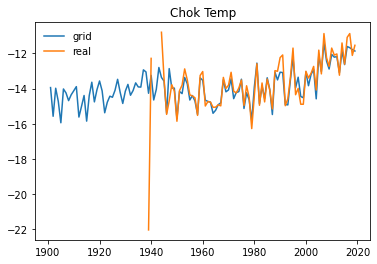

r=0.181, p=0.1898


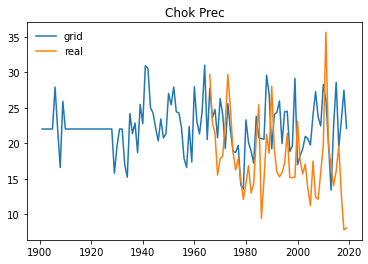

r=0.212, p=0.0637


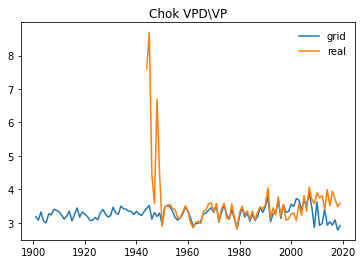

r=0.782, p=0.0000


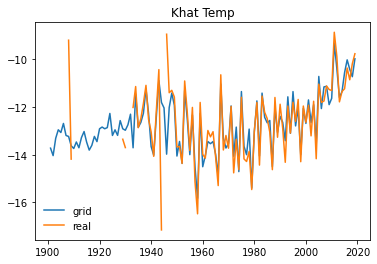

r=0.890, p=0.0000


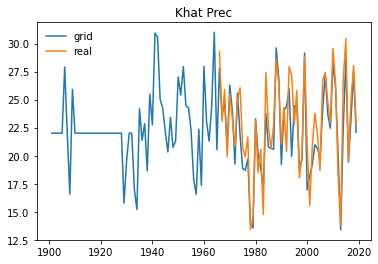

r=0.673, p=0.0000


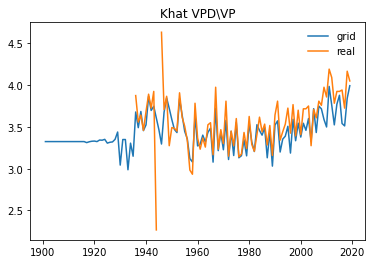

r=0.926, p=0.0000


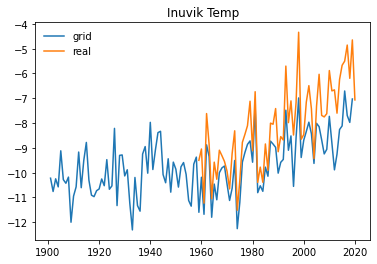

r=0.589, p=0.0000


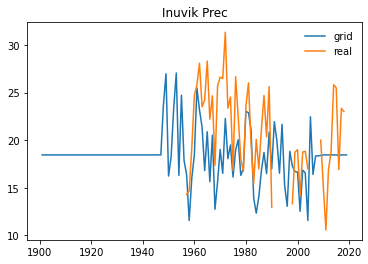

r=0.323, p=0.0111


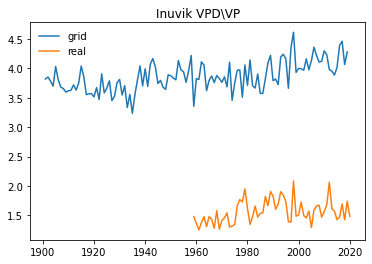

In [10]:
plot_mean_ds(grid_temp_C, mean_temp_C, 'Chok Temp', 'grid', 'real')
plot_mean_ds(grid_prec_C, mean_prec_C, 'Chok Prec', 'grid', 'real')
plot_mean_ds(grid_vp_C, mean_vpd_C, 'Chok VPD\VP', 'grid', 'real')
plot_mean_ds(grid_temp_H, mean_temp_H, 'Khat Temp', 'grid', 'real')
plot_mean_ds(grid_prec_H, mean_prec_H, 'Khat Prec', 'grid', 'real')
plot_mean_ds(grid_vp_H, mean_vpd_H, 'Khat VPD\VP', 'grid', 'real')
plot_mean_ds(grid_temp_I, mean_temp_I, 'Inuvik Temp', 'grid', 'real')
plot_mean_ds(grid_prec_I, mean_prec_I, 'Inuvik Prec', 'grid', 'real')
plot_mean_ds(grid_vp_I, mean_VPD_I, 'Inuvik VPD\VP', 'grid', 'real')

In [80]:
df = pd.read_csv('input\Канада\Инувик\По Месяцам\INUVIK_A_1968-2020_MONTHLY.csv')

In [88]:
from climate_weather_gc_ca import montly_to_measurement

In [7]:
res_df = montly_to_measurement(df, 'Temp (°C)')

In [15]:
grid_vp_C = pd.read_csv('output/__Файлы__/грид_vpd/чокурдах_грид_VP_точнее.csv')
grid_vp_H = pd.read_csv('output/__Файлы__/грид_vpd/хатанга_грид_VP_точнее.csv')
grid_vp_I = pd.read_csv('output/__Файлы__/грид_vpd/инувик_грид_VP_точнее.csv')

r=0.212, p=0.0637


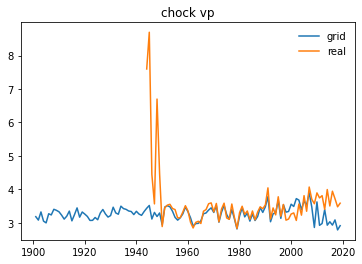

r=0.673, p=0.0000


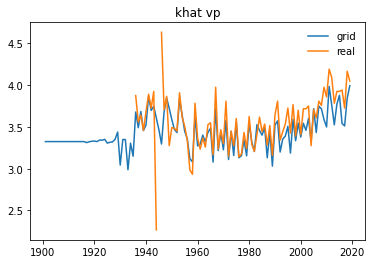

r=0.323, p=0.0111


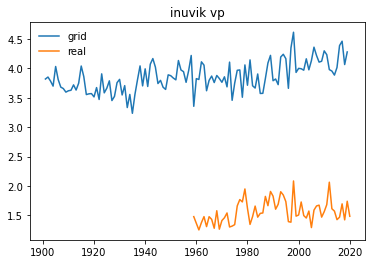

In [16]:
plot_mean_ds(grid_vp_C, mean_vpd_C, 'chock vp', 'grid', 'real')
plot_mean_ds(grid_vp_H, mean_vpd_H, 'khat vp', 'grid', 'real')
plot_mean_ds(grid_vp_I, mean_VPD_I, 'inuvik vp', 'grid', 'real')

r=0.709, p=0.0000


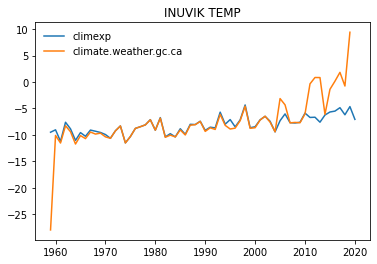

In [89]:
plot_mean_ds(mean_temp_I, grid_temp_I, 'INUVIK TEMP', 'climexp', 'climate.weather.gc.ca')

In [256]:
plot_trends(res_df, 'Inuvik', 'Relative humidity (%)', 1980, 2020)

In [250]:
plot_trends(res_df, 'Inuvik', 'Temperature (°C)', 1901, 1979)

In [12]:
res_df.to_excel('INUVIK A TEMP.xlsx', index=False)

In [17]:
def celsius_to_fahrenheit(x):
    return x * 9/5 + 32

def celsius_to_rankine(x):
    return x * 9/5 + 32 + 459.67

In [54]:
def get_e_mb(T):
    return 6.1078 * np.e ** ((17.269 * T) / (273.3 + T))


def get_dew_point_temp(T, RH):
    X = np.log(RH / 100) + (17.269 * T) / (237.3 + T)
    return (273.3 * X) / (17.269 - X)


def get_vpd(T, RH):
    return get_e_mb(T) - get_e_mb(get_dew_point_temp(T, RH))

In [97]:
montly_to_measurement(df, 'Rel Hum (%)').to_csv('INUVIK_A_RELATIVE_HUM.csv', index=False)

In [82]:
df['VPD (mbar)'] = get_e_mb(df['Temp (°C)']) - get_e_mb(df['Dew Point Temp (°C)'])

In [70]:
pearsonr(get_e_mb(df['Temp (°C)']) - get_e_mb(df['Dew Point Temp (°C)']), get_vpd(df['Temp (°C)'], df['Rel Hum (%)']))

(0.9857251541183312, 0.0)

In [4]:
def csv_to_xlsx(path):
    path = path.replace('\\','/')
    df = pd.read_csv(path)
    df.to_excel(path.split('.')[0]+'.xlsx', index=False)

def csv_to_climexp(path):
    path = path.replace('\\','/')
    df = pd.read_csv(path)
    df = df.replace(np.nan, -999.9)
    df = df.drop(['Индекс ВМО'], axis=1)
    df.to_csv(path.split('.')[0]+'.txt', index=None, sep=' ')

In [10]:
csv_to_climexp('input\Чокурдах и Хатанга\csv\Чокурдах_Упругость_водяного_пара.csv')

In [ ]:
dat_to_df('output/__Файлы__/грид/грид_осадки/инувик_осадки_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_осадки/хатанга_осадки_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_осадки/чокурдах_осадки_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_температура/инувик_температура_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_температура/хатанга_температура_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_температура/чокурдах_температура_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_vpd/инувик_грид_VP_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_vpd/хатанга_грид_VP_точнее.txt')
dat_to_df('output/__Файлы__/грид/грид_vpd/чокурдах_грид_VP_точнее.txt')

In [74]:
trw_tay = pd.read_excel('input/Хронологии/Таймыр/TAY_chr.xlsx').drop(0)
trw_tay = trw_tay.drop(len(trw_tay))

In [100]:
len(trw_tay[trw_tay['Year']>=1928])

92

In [28]:
months = ["Январь", "Февраль", "Март", "Апрель",
 "Май", "Июнь", "Июль", "Август",
  "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]

In [ ]:
        #ps1 = [f'p={v:0.03f}' if v <0.05 else '' for v in ps[key]]
        #for i, txt in enumerate(ps1):
        #    add = .01 if rs[key][i] > 0 else -.04
        #    ax.annotate(txt, (i-.5, rs[key][i]+add))

In [202]:
plot_mothly_dendroclim(trw_tay,
                       [mean_prec_H.rename(columns={'Год':'Year'}),
                       mean_temp_H.rename(columns={'Год':'Year'}),
                       mean_vpd_H.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'Khatanga-Taymyr')

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Khatanga-Taymyr'}, xlabel='Months', ylabel='Pearson R'>)

In [203]:
plot_mothly_dendroclim(trw_tay, [grid_prec_H.rename(columns={'Год':'Year'}), grid_temp_H.rename(columns={'Год':'Year'})], ['Precipitation', 'Temperature'], ['blue', 'red'],'Grid Khatanga-Taymyr')

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Grid Khatanga-Taymyr'}, xlabel='Months', ylabel='Pearson R'>)

In [77]:
t, p = get_crn_climate_correlation(temperature.drop([2020], axis=1), precipitation.drop([2020], axis=1), trw_tay[trw_tay['Year']>=1928]['TAY_std'], 1928, 2019, grab=150, window=10)

In [19]:
pd.read_csv("input/Канада/Инувик/По Дням/from_dat_INUVIK_TEMP_DAILY.csv")